# **Predicting House Prices**

## 1. Introduction

* **Objective**: The goal of this study is to accurately predict house prices using a variety of features from a given dataset.

* **Importance**: Predicting house prices is a crucial task that can benefit real estate professionals, buyers, and sellers by providing data-driven insights. These predictions help in making informed decisions regarding property investments, market evaluations, and pricing strategies.

## 2. Data Loading

* **Loading Data**: We begin by loading the dataset and examining its contents to gain an initial understanding.

In [26]:
import pandas as pd

df = pd.read_csv("C:/Users/aurel/Documents/Python Scripts/Machine learning/housing.csv")
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06,USS Wallace\nFPO AE 73316


## 3. Data Exploration

* **Data Shape and Types**: The DataFrame has a shape of (5000, 7), indicating that it contains 5000 rows and 7 columns. Each row represents a single observation (a house), and each column corresponds to a different feature or attribute of these observations. All variables are numerical (float64).

* **Descriptive Statistics**: The descriptive statistics reveal that the dataset consists of 5000 records with attributes related to housing and area demographics. The average house price is approximately \$1.23 million, with a significant range from about \$15,939 to \$2.47 million. On average, houses have around 7 rooms and nearly 4 bedrooms, with house ages averaging about 6 years. Area income averages around \$68,583, while the average population of the areas is approximately 36,164. The data shows some variation in these attributes, with standard deviations indicating moderate to high dispersion from the mean values.

In [27]:
print(df.shape, '\n')
df.info()

(5000, 7) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [28]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


## 4. Data Visualization

* **Price Distribution**: This involves creating a visual representation to show how house prices are spread out.

* **Feature Relationships**: This refers to plotting graphs that show how different features relate to the target variable, which in this case is the house price.

* **Correlation Matrix**: This is a heatmap that shows the correlation coefficients between pairs of features. Correlation coefficients range from -1 to 1, where -1 indicates a strong negative relationship, 1 indicates a strong positive relationship, and 0 means no relationship.

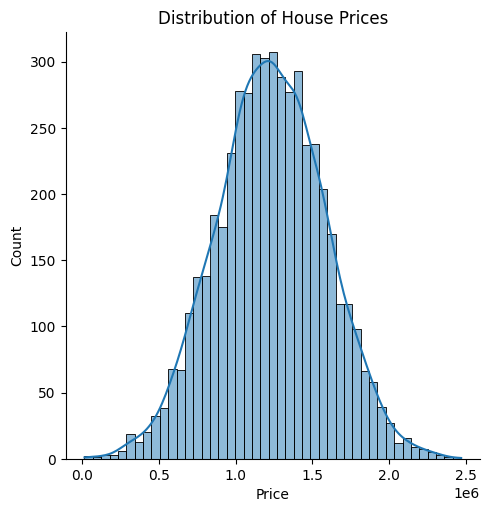

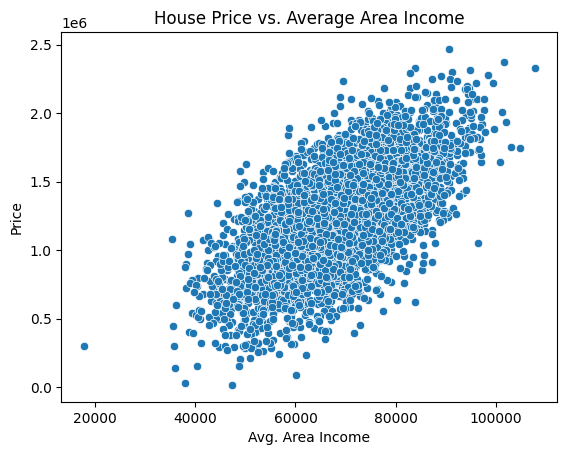

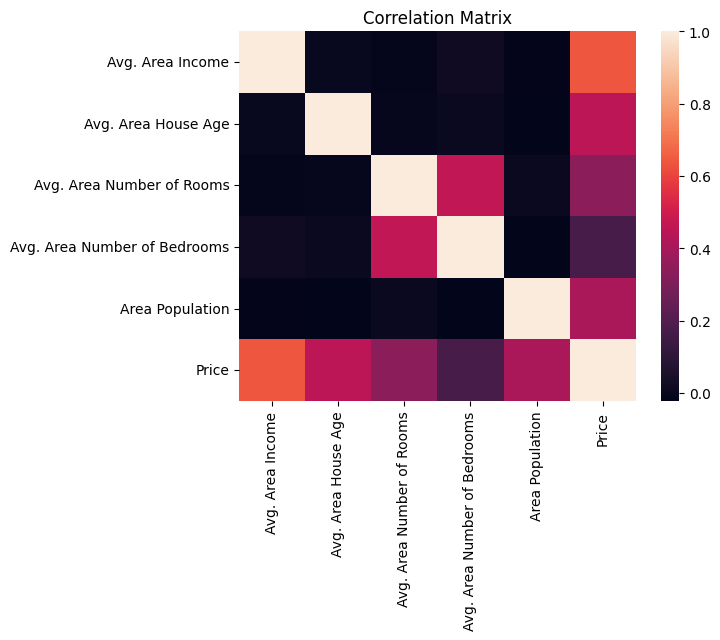

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

sns.displot(df["Price"], kde=True)
plt.title("Distribution of House Prices")
plt.show()

sns.scatterplot(x=df["Avg. Area Income"], y=df["Price"])
plt.title("House Price vs. Average Area Income")
plt.show()

df_corr = df.drop("Address", axis=1)

sns.heatmap(df_corr.corr())
plt.title("Correlation Matrix")
plt.show()

## 5. Data Preprocessing

- **Handling Missing Values**: This step involves checking for any missing values and addressing them appropriately to ensure data integrity.
  
- **Removing Irrelevant Columns**: Eliminate columns that do not contribute to the model's performance, such as the "Address" column.

- **Feature Selection**: Identify and separate the predictor variables (X) from the target variable (y) to prepare for model training.

- **Feature Scaling**: Standardize the numerical features to bring them to a common scale, improving model performance.

In [ ]:
# Handling Missing Values
print(df.isna().sum())

# Removing Irrelevant Columns
df = df.drop("Address", axis=1)

# Feature Selection
x = df.drop("Price", axis=1)   # All variables without prices
y = df["Price"]

In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

## 6. Model Building

* **Train-Test Split**: This step involves dividing the dataset into two parts: a training set and a testing set. In this case, 80% of the data is allocated to the training set, which is used to train the model, while the remaining 20% is set aside as the testing set to evaluate the model's performance on unseen data.

* **Linear Regression Model**: We are going to train a linear regression model on the training set and evaluate its performance on the testing set. We are using a **Linear Regression model** for this study because it is well-suited for predicting a continuous numerical outcome (in this case, house prices) based on several input features.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=123)
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(f"R² Score: {r2_score(y_test, y_pred)}")

## 7. Results and Evaluation

* **Model Performance**: The linear regression model achieved an R² score of 0.92, indicating that approximately 92% of the variance in house prices is explained by the model. This high R² value suggests that the model has strong predictive power and fits the data well. However, it's important to note that while the R² score is high, it doesn’t guarantee perfect predictions, and there could still be some error in the individual predictions.

* **Predictions vs. Actual Prices**: To further evaluate the model's performance, a scatter plot was used to compare the predicted house prices with the actual prices from the test set. The plot suggests that the model has good predictive ability, as most of the predicted values are closely aligned with the actual values.

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

## Conclusion

* **Summary**: In this study, we aimed to predict house prices using a dataset that included various features such as average area income, house age, number of rooms, number of bedrooms, and area population. We started by loading and exploring the data to understand its structure and distribution. Visualizations such as the distribution of house prices and feature relationships were created to gain further insights. After preprocessing the data, which involved handling missing values, removing irrelevant columns, and scaling the features, we built a linear regression model. The model achieved a high R² score of 0.92, indicating strong predictive performance. The scatter plot comparing actual versus predicted prices showed that the model predictions were closely aligned with the real values, making it effective for predicting house prices.

* **Future Work**: To further improve the model's accuracy and generalizability, several enhancements could be considered:

    1. Incorporate additional features such as location data (city, proximity to amenities, etc.) or property-specific characteristics (square footage, type of construction) to capture more information that influences house prices.
    
    2. Explore non-linear models like Random Forests, Gradient Boosting, or Neural Networks to handle potential non-linear relationships between features and house prices.

    3. Evaluate model robustness by implementing cross-validation techniques to ensure the model performs consistently across different data subsets.

    4. Address potential overfitting by incorporating regularization techniques such as Ridge or Lasso regression to ensure the model generalizes well to unseen data.
    
    5. Update the model with real-time data to keep it relevant and accurate in changing market conditions, which would improve its predictive capabilities over time.

## References

* [Dataset link]()

* [Regression Sk Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)